In [1]:
import os
%load_ext autoreload
%autoreload 2

""""
For extracting and saving DFallpa objects
"""

'"\nFor extracting and saving DFallpa objects\n'

# Load a DFallpa

Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*220608*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/220608/Pancho-220608-143122
session:  0
Beh Sessions that exist on this date:  {220608: [(1, 'priminvar2')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['priminvar2']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*220608*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/220608/Pancho-220608-143122
{'filename_components_hyphened': ['Pancho', '220608', '143122'], 'basedirs': ['/home/lucas/mnt/Freiwald/ltian/recordings/Pancho', '/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/220608'], 'basedirs_filenames': ['220608', 'Pancho-220608-143122'], 'filename_final_ext': 'Pancho-220608-143122', 'filename_final_noext': 'Pancho-220608-143122'}
FOund t

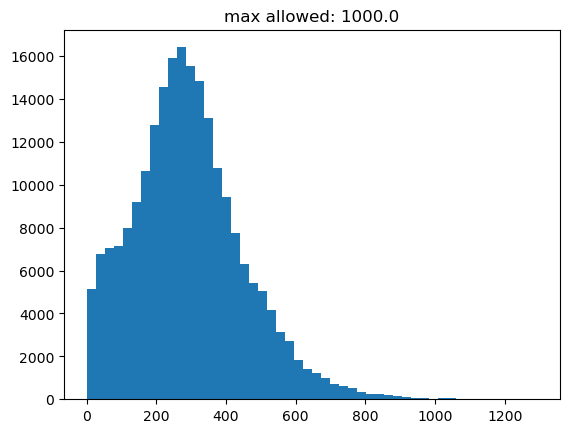

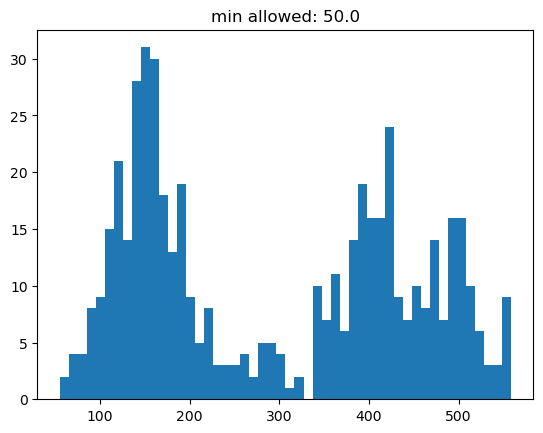

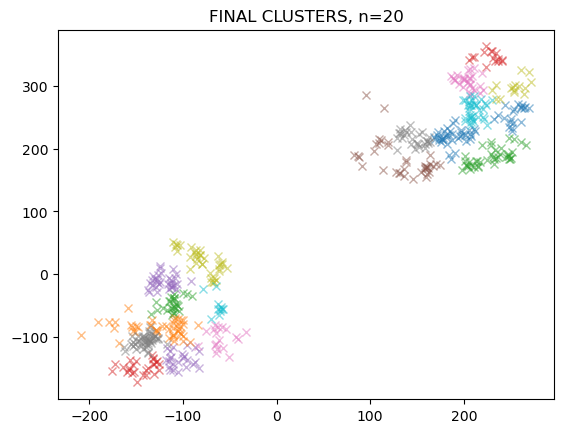

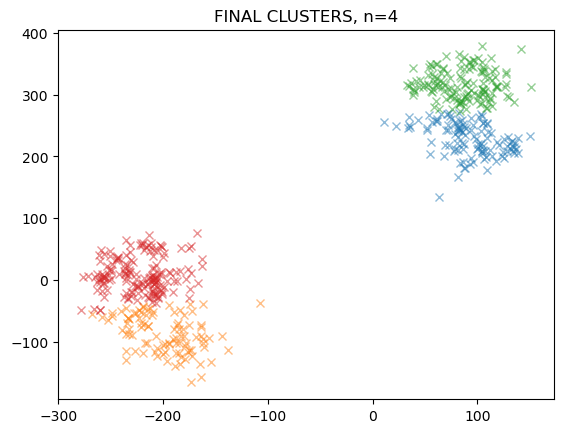

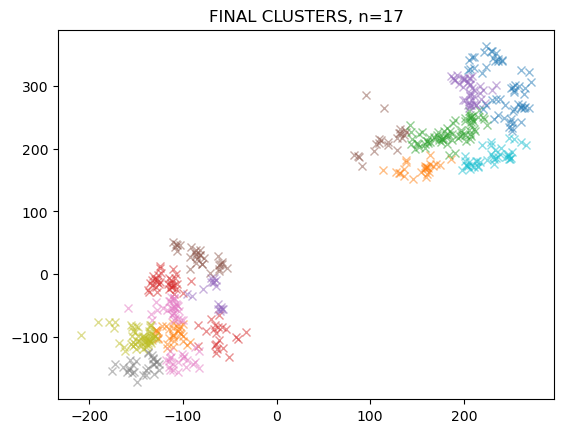

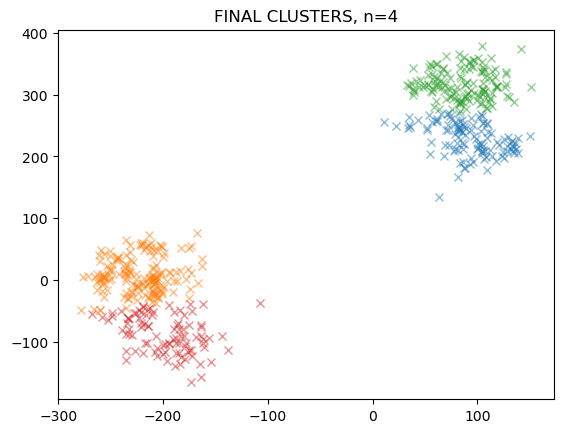

In [5]:
# Char, 
# animal = "Pancho"
# date = 230126
# do_combine = True

# Single prim, novels
animal = "Pancho"
date = 220608
# animal = "Diego"
# # date = 231211
# date = 230615
# date = 230817
do_combine = False

if do_combine:
    # COMBINE trial and stroke
    dir_suffix = "test"
    question = None
    # q_params = None
    which_level = None
    q_params = {
        "effect_vars": ["seqc_0_shape", "seqc_0_loc"]
    }
    
    combine_trial_and_stroke = True
    
    # PIG
    # question_trial = "PIG_BASE_trial"
    # question_stroke = "PIG_BASE_stroke"
    # check_that_locs_match = True
    
    # CHAR
    question_trial = "CHAR_BASE_trial"
    question_stroke = "CHAR_BASE_stroke"
    check_that_locs_match = True
    check_that_shapes_match = True
else:
    # DONT COMBINE, use questions.
    # question = "SS_shape"
    # question = "CHAR_BASE_stroke"
    # question = "CHAR_BASE_trial"
    # question = "SP_shape_loc"
    # question = "SP_BASE_stroke"
    question = "SP_BASE_trial"
    # question = "PIG_BASE_trial"
    # question = "PIG_BASE_stroke"
    # question = "RULE_ANBMCK_STROKE"
    combine_trial_and_stroke = False
    which_level = "trial" # Doesnt matter
    # which_level = "stroke" # Doesnt matter
    # which_level = "substroke" # Doesnt matter
    dir_suffix = question

    # Load q_params
    from neuralmonkey.analyses.rsa import rsagood_questions_dict, rsagood_questions_params
    q_params = rsagood_questions_dict(animal, date, question)[question]

############### PARAMS
exclude_bad_areas = True
# SPIKES_VERSION = "kilosort_if_exists" # since Snippets not yet extracted for ks
SPIKES_VERSION = "tdt" # since Snippets not yet extracted for ks
combine_into_larger_areas = True

HACK_RENAME_SHAPES = "CHAR" in question

list_time_windows = [(-0.8, 0.8)]
events_keep = None
events_keep = ["03_samp", "05_first_raise", "06_on_strokeidx_0"]
fr_normalization_method = None
# fr_normalization_method = "across_time_bins"

########################################## RUN

if combine_trial_and_stroke:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper_combine_trial_strokes
    DFallpa = dfallpa_extraction_load_wrapper_combine_trial_strokes(animal, date, question_trial,
                                                                       question_stroke,
                                                list_time_windows, events_keep=events_keep,
                                               combine_into_larger_areas = combine_into_larger_areas,
                                               exclude_bad_areas=exclude_bad_areas,
                                                SPIKES_VERSION="tdt",
                                                HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                               fr_normalization_method=fr_normalization_method,
                                                    check_that_shapes_match=check_that_shapes_match,
                                                check_that_locs_match=check_that_locs_match)
else:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
    DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                              which_level=which_level, events_keep=events_keep,
                                              combine_into_larger_areas = combine_into_larger_areas,
                                              exclude_bad_areas = exclude_bad_areas,
                                              SPIKES_VERSION = SPIKES_VERSION,
                                              HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                              fr_normalization_method=fr_normalization_method)

In [1]:
DFallpa

NameError: name 'DFallpa' is not defined

In [ ]:
pa = DFallpa["pa"].values[0]

In [ ]:
for col in pa.Xlabels["trials"]:
    print(col, "   ====   ", type(pa.Xlabels["trials"][col].values[0]))

# Saving DFallpa

### Save DFallpa as is

In [6]:
# Save it
import pandas as pd
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_2.pkl" # (tdt) (no norm)
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_3.pkl" # (no norm)
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_4.pkl" # (tdt)
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_KS.pkl" # (kilosort)
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_KS_nonorm.pkl" # (kilosort)

# Dan: tough decoding, syntax stuff.
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa-{animal}-{date}-{which_level}-tdt_nonorm.pkl"

# Xuan: Diego, char, good for testing tough shape decoding
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-{animal}-{date}-{which_level}-ks_nonorm.pkl"
path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-{animal}-{date}-{which_level}-{SPIKES_VERSION}-norm={fr_normalization_method}-combine={combine_into_larger_areas}.pkl"

pd.to_pickle(DFallpa, path)
print("Saved to:", path)

Saved to: /home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Pancho-220608-trial-tdt-norm=None-combine=True.pkl


### Save raw data

In [ ]:

##### To save DFallPA
from neuralmonkey.classes.population_mult import data_extract_raw_and_save
# savepath = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_KS_nonorm_raw.pkl"

# savepath = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa-{animal}-{date}-{which_level}-tdt_nonorm_raw.pkl"
# savepath = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-{animal}-{date}-{which_level}-ks_nonorm-RAW.pkl"
savepath = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-{animal}-{date}-{which_level}-{SPIKES_VERSION}-norm={fr_normalization_method}-combine={combine_into_larger_areas}-RAW.pkl"

data_extract_raw_and_save(DFallpa, savepath)
# pd.to_pickle(DFallpa, savepath)gm

# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper
DFallpa = load_handsaved_wrapper()

##### [Optionally, merge across events]

In [ ]:
DFallpa

In [ ]:
from neuralmonkey.classes.population_mult import dfpa_group_and_split

DFallpa = dfpa_group_and_split(DFallpa, ["event"], concat_dim="trials")

In [ ]:
DFallpa

In [ ]:
pa = DFallpa["pa"].values[0]
pa.Xlabels["trials"]["event"].value_counts()
pa.plotNeurHeat(0)

##### Preprocess fr normalization?

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
dfallpa_preprocess_fr_normalization(DFallpa, "across_time_bins")